# Intro
Simple Program to load and check the 4STAR archive files.

For R0 of ORACLES 2017, aod and Gases

# Load the defaults and imports

In [56]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot

In [57]:
%matplotlib notebook

In [58]:
fp =getpath('ORACLES')#'C:/Userds/sleblan2/Research/ORACLES/'
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

# load the files

In [4]:
days = ['20180924','20180927','20180930','20181002','20181003','20181005','20181007'] #,'20170818','20170819']

In [59]:
days = ['20181010','20181012']
#days = ['20170813','20170817']
#days = ['20170818','20170819']
days = ['20181019']
#days = ['20170824','20170826']
#days = ['20170812']
#days = ['20170801','20170802','20170903','20170904']
#days = ['20170807']

In [60]:
vv = 'R0'

In [61]:
vi = ''

In [62]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for i,d in enumerate(days):
    try:
        print 'Doing day: {}'.format(d)
        fname_aod = fp+'aod_ict_2018/4STAR-AOD_P3_{}_{vv}.ict'.format(d,vv=vv,vi=vi)
        tt,th = load_ict(fname_aod,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        days.pop(i)
        continue
    
    outaod_RA.append(tt)
    outaod_head_RA.append(th)
    
    #fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    #ttr,thr = load_ict(fname_gas,return_header=True)
    #outgas_RA.append(ttr)
    #outgas_head_RA.append(thr)

Doing day: 20181019
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')


In [63]:
len(outaod_RA)

1

In [64]:
len(days)

1

## Check the files for integrity and header info

In [14]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on {vv} aod string line {}: {} and {vv} of num {}:{} '.format(i,s,ig,g[i],vv=vv)
#    for ir,r in enumerate(outgas_head_RA):
#        if not s==r[i]:
#            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

no match on R0 aod string line 0: 91, 1001
 and R0 of num 1:92, 1001
 
no match on R0 aod string line 6: 2018, 09, 24, 2018, 09, 28
 and R0 of num 1:2018, 09, 27, 2018, 09, 28
 
no match on R0 aod string line 69: 2
 and R0 of num 1:3
 
no match on R0 aod string line 70: Using the C0 calibration file:  20180922_VIS_C0_refined_averaged_4STAR_MLO_inflight.dat.
 and R0 of num 1:The uncertainty for this flight has been increased to reflect the potential impact of deposition on the window.
 
no match on R0 aod string line 71: Using the C0 calibration file:  20180922_NIR_C0_refined_averaged_4STAR_MLO_inflight.dat.
 and R0 of num 1:Using the C0 calibration file:  20180922_VIS_C0_refined_averaged_4STAR_MLO_inflight.dat.
 
no match on R0 aod string line 72: 18
 and R0 of num 1:Using the C0 calibration file:  20180922_NIR_C0_refined_averaged_4STAR_MLO_inflight.dat.
 
no match on R0 aod string line 73: PI_CONTACT_INFO: Samuel.leblanc@nasa.gov
 and R0 of num 1:18
 
no match on R0 aod string line 74

In [15]:
print 'day:       AOD {vv}     GAS {vv}'.format(vv=vv)
for i,d in enumerate(days):
    try:
        print '{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC']))
    except:
        print '{}: missed'.format(d)

day:       AOD R0     GAS R0
20180924: missed
20180927: missed


In [65]:
outaod_head_RA[-1]

['92, 1001\n',
 'Samuel LeBlanc\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2018\n',
 '1, 1\n',
 '2018, 10, 19, 2018, 10, 21\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20181019\n',
 '57\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -9999.0000000, -9999.0000000, -9999.0, -9999, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000,

In [14]:
outgas_head_RA[0]

IndexError: list index out of range

## Check the variables in header

In [66]:
nm = outaod_RA[0].dtype.names

In [67]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD_angstrom_470_865',
 'AOD_polycoef_a2',
 'AOD_polycoef_a1',
 'AOD_polycoef_a0',
 'AOD0355',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0700',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1250',
 'AOD1559',
 'AOD1627',
 'AOD1650',
 'UNCAOD0355',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0700',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

In [68]:
wl = nm[10:-1]

In [69]:
wl = wl[0:24]

In [15]:
plt.figure()
plt.plot(out_R2[0][nm[0]],out_R2[0][nm[9]],'.')
for x in out_R2[0][nm[0]][np.where(out_R2[0][nm[4]]==1)[0]]:
    plt.axvline(x,color='#DDDDDD',alpha=0.02)

<IPython.core.display.Javascript object>

NameError: name 'out_R2' is not defined

In [70]:
for a in wl:
    print a

AOD0355
AOD0380
AOD0452
AOD0470
AOD0501
AOD0520
AOD0530
AOD0532
AOD0550
AOD0606
AOD0620
AOD0660
AOD0675
AOD0700
AOD0781
AOD0865
AOD1020
AOD1040
AOD1064
AOD1236
AOD1250
AOD1559
AOD1627
AOD1650


# Plot the files

<IPython.core.display.Javascript object>


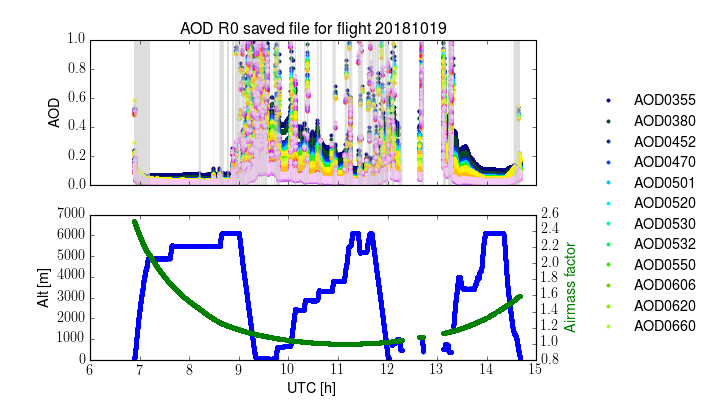

In [71]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} saved file for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ax[0].plot(outaod_RA[i][nm[0]],outaod_RA[i][aod],'.',label=aod)
    try:
        for x in outaod_RA[i][nm[0]][np.where(outaod_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,1)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Plot the high altitude subset of the data for calibration

<IPython.core.display.Javascript object>


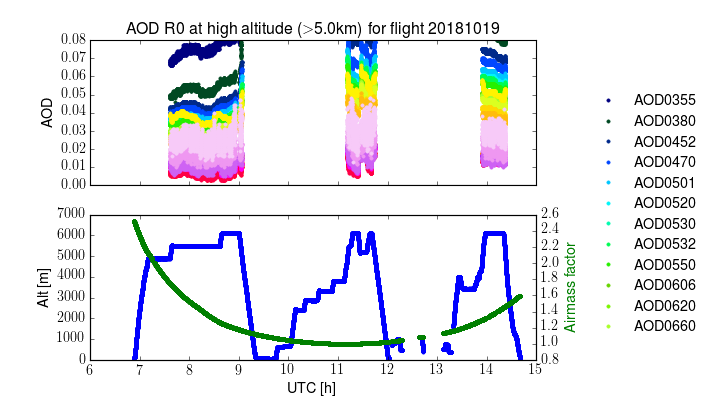

In [72]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$5.0km) for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,0.08)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_high_alt_AOD_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [15]:
wl[0:16]

('AOD0355',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0700',
 'AOD0781',
 'AOD0865')

<IPython.core.display.Javascript object>


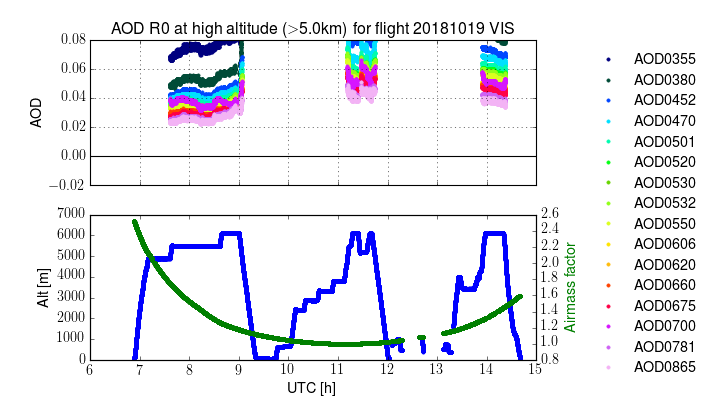

In [73]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$5.0km) for flight {} VIS'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:16]:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.08)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_high_alt_AOD_{vi}_{}_vis.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [74]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$5.0km) for flight {} NIR'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[16:])+1)])
    for aod in wl[16:]:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.05)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_high_alt_AOD_{vi}_{}_nir.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

<IPython.core.display.Javascript object>

## Plot the ACAOD (mid altitude 600-1800 m)

In [75]:
    i,d = 5,'20181005'
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at mid altitude (1.8 - 3.5 km) for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>1800)&(outaod_RA[i]['GPS_Alt']<3500))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0.04,0.35)
    ax[0].set_xlim(8.65,9.05)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    ax[1].set_xlim(8.65,9.05)
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_mid_alt_AOD_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

<IPython.core.display.Javascript object>

IndexError: list index out of range

<IPython.core.display.Javascript object>


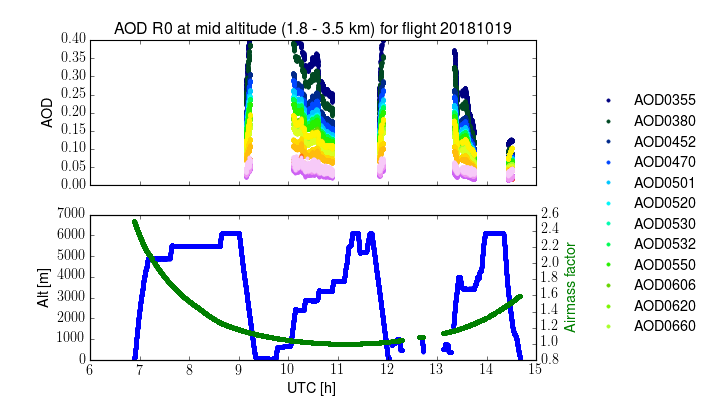

In [76]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at mid altitude (1.8 - 3.5 km) for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>1800)&(outaod_RA[i]['GPS_Alt']<3500))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,0.4)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_mid_alt_AOD_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


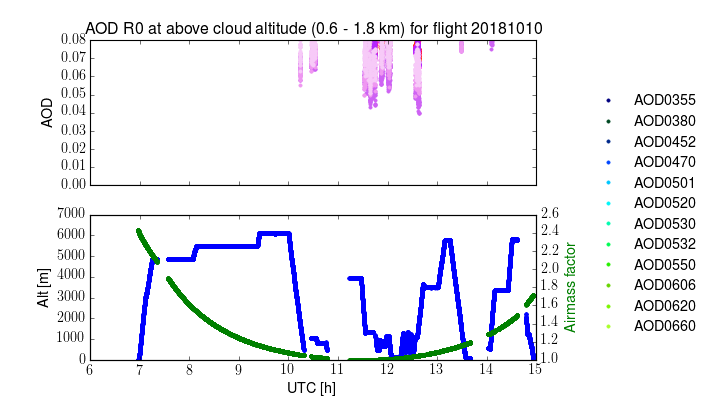

<IPython.core.display.Javascript object>


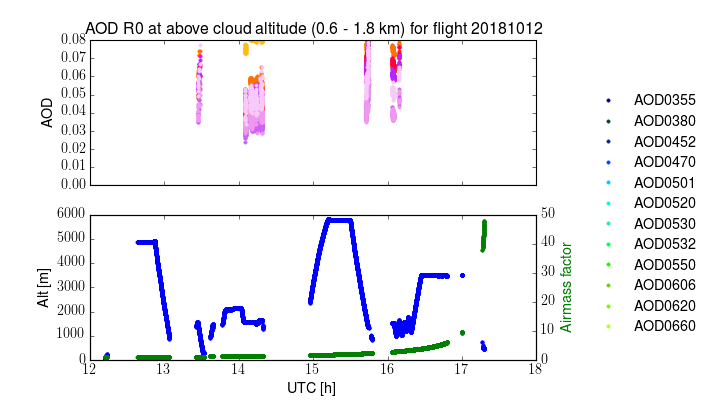

In [21]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at above cloud altitude (0.6 - 1.8 km) for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>600)&(outaod_RA[i]['GPS_Alt']<1800))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,0.08)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_mid_alt_AOD_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Plot the AOD with the uncertainty

In [77]:
nm[34:50]

('UNCAOD0355',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0700',
 'UNCAOD0781',
 'UNCAOD0865')

<IPython.core.display.Javascript object>


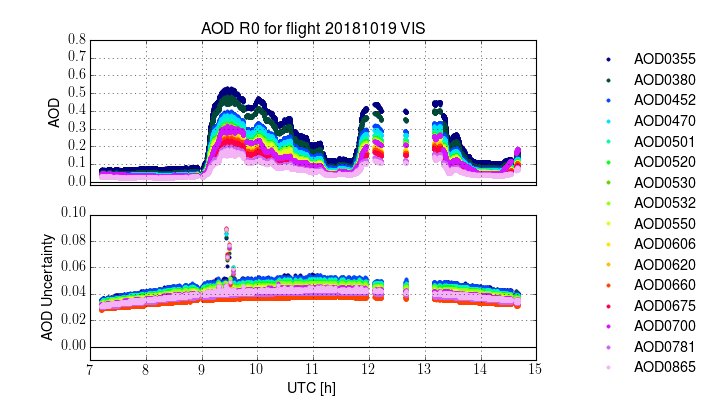

In [78]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {} VIS'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:16]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.8)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for unc in nm[34:50]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_uncert_{vi}_{}_vis.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [17]:
nm[50:]

('UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

In [18]:
nm[50:]

('UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

<IPython.core.display.Javascript object>


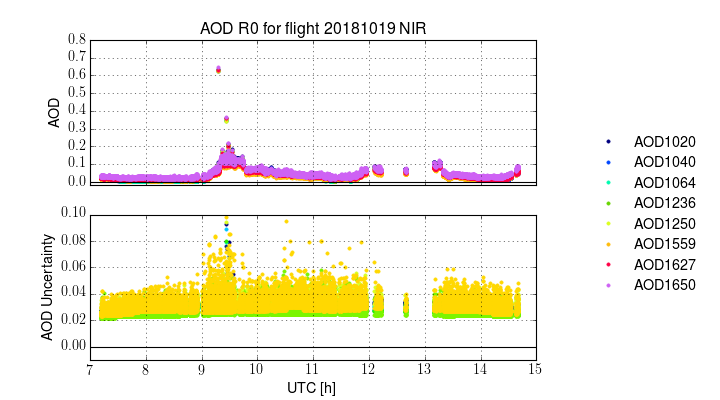

In [80]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {} NIR'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[16:])+1)])
    for aod in wl[16:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.8)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(nm[46:])+1)])
    for unc in nm[50:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_uncert_{vi}_{}_nir.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [19]:
outaod_RA[i][unc][ii]

NameError: name 'unc' is not defined

In [20]:
nm[4]

'qual_flag'

<IPython.core.display.Javascript object>


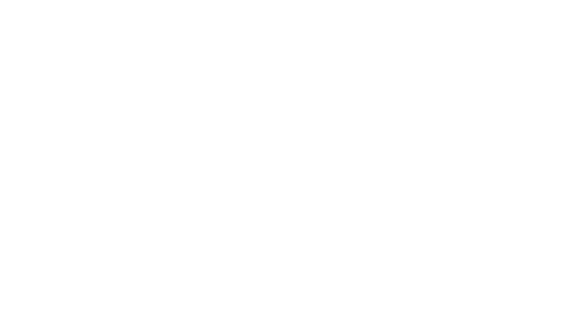

IndexError: index 27691 is out of bounds for axis 1 with size 27691

In [43]:
plt.figure()
ii = np.where((outaod_RA[0][nm[4]]==0))[0]
plt.plot(outaod_RA[0][nm[0]][ii],outaod_RA[i][unc][ii],'.')

## Plot spectral aod figures for high altitude

In [81]:
wv = [float(v[3:]) for v in wl]

In [82]:
wv

[355.0,
 380.0,
 452.0,
 470.0,
 501.0,
 520.0,
 530.0,
 532.0,
 550.0,
 606.0,
 620.0,
 660.0,
 675.0,
 700.0,
 781.0,
 865.0,
 1020.0,
 1040.0,
 1064.0,
 1236.0,
 1250.0,
 1559.0,
 1627.0,
 1650.0]

<IPython.core.display.Javascript object>


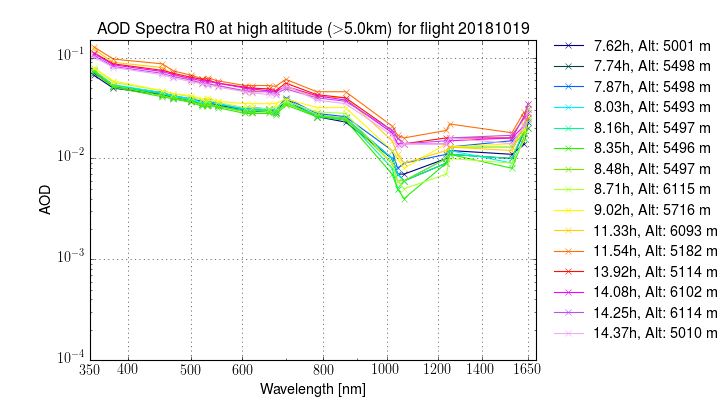

In [83]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(9,5))
    #ax = ax.ravel()
    ax.set_title('AOD Spectra {} at high altitude ($>$5.0km) for flight {}'.format(vv,d))
    ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
    if not any(ii): continue
    js = np.linspace(0,len(ii)-1,15).astype(int)
    ax.set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, 16)])
    for j in js:
        sp = np.array([outaod_RA[i][n][ii[j]] for n in wl])
        fo = {'u':outaod_RA[i]['Start_UTC'][ii[j]],'a':outaod_RA[i]['GPS_Alt'][ii[j]]}
        if not np.isfinite(sp).any(): continue
        if any(sp>0.0):
            ax.plot(wv,sp,'x-',label='{u:5.2f}h, Alt: {a:5.0f} m'.format(**fo))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('AOD')
    ax.set_ylim(0.0001,0.15)
    ax.set_xlabel('Wavelength [nm]')
    ax.set_xlim(350.0,1700.0)
    plt.xticks([350,400,500,600,800,1000,1200,1400,1650])
    
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(frameon=False,loc='top left',bbox_to_anchor=(1.01,1.04),numpoints=1)
    ax.grid()
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_high_alt_AOD_spectra_{vi}_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Special case plotting

In [80]:
outaod_RA

[array([ (8.355833333333333, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (8.356111111111112, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (8.356388888888889, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        ...,
        (16.560277777777777, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [33]:
ax[0].set_ylim(0,15)

TypeError: 'AxesSubplot' object does not support indexing

In [81]:
fig.show()

In [34]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD_angstrom_470_865',
 'AOD_polycoef_a2',
 'AOD_polycoef_a1',
 'AOD_polycoef_a0',
 'AOD0355',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0700',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1250',
 'AOD1559',
 'AOD1627',
 'AOD1650',
 'UNCAOD0355',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0700',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

<IPython.core.display.Javascript object>


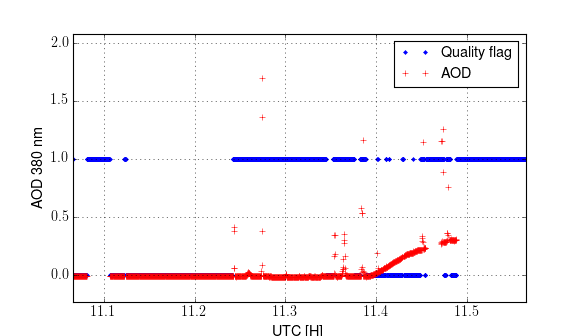

In [83]:
plt.figure()
plt.plot(outaod_RA[0]['Start_UTC'],outaod_RA[0]['qual_flag'],'b.',label='Quality flag')
plt.plot(outaod_RA[0]['Start_UTC'],outaod_RA[0]['AOD0380'],'r+',label='AOD')
plt.ylim(0,12)
plt.xlim(11.8,12.3)
plt.ylabel('AOD 380 nm')
plt.xlabel('UTC [H]')
plt.legend()
plt.grid()
plt.savefig(fp+'aod_ict/{vv}_20160920_zoom_QA_flag.png'.format(vv=vv),dpi=600,transparent=True)

### Special plotting of AOD per altitude and latitude

In [84]:
days

['20181019']

<IPython.core.display.Javascript object>


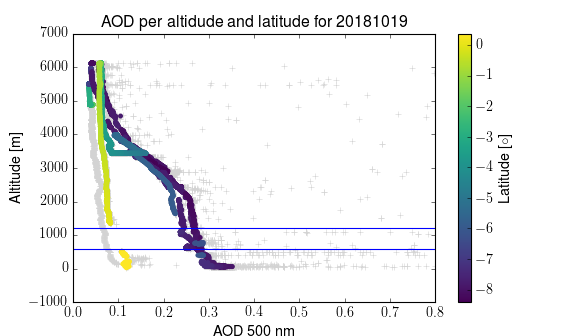

In [85]:
for i,d in enumerate(days):
    plt.figure()
    #d = days[15]
    plt.plot(outaod_RA[i]['AOD0501'],outaod_RA[i]['GPS_Alt'],'+',color='lightgrey',zorder=0)
    b = plt.scatter(outaod_RA[i]['AOD0501'][outaod_RA[i]['qual_flag']==0],outaod_RA[i]['GPS_Alt'][outaod_RA[i]['qual_flag']==0],
                marker='o',edgecolor='None',c=outaod_RA[i]['Latitude'][outaod_RA[i]['qual_flag']==0],cmap='viridis')
    plt.axhline(600)
    plt.axhline(1200)
    plt.xlim(0,0.8)
    plt.xlabel('AOD 500 nm')
    plt.ylabel('Altitude [m]')
    plt.title('AOD per altidude and latitude for {}'.format(d))
    try:
        cb = plt.colorbar(b)
        cb.set_label('Latitude [$\\circ$]')
    except:
        pass
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_{}_aod_alt_lat.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Make plots of angstrom exponent

In [29]:
wls = [0.38,0.452,0.501,0.520,0.532,0.55,0.606,0.620,0.675,0.781,0.865,1.02,1.04,1.064,1.236,1.559]

In [86]:
wls = np.array(wv)/1000.0

In [87]:
wl[4]

'AOD0501'

<IPython.core.display.Javascript object>


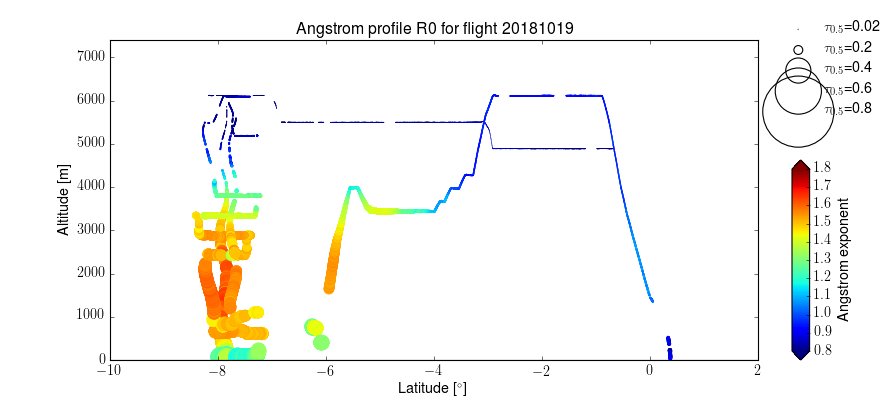

In [88]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(11,5))
    ax.set_title('Angstrom profile {} for flight {}'.format(vv,d))
    v = ax.scatter(outaod_RA[i]['Latitude'][outaod_RA[i]['qual_flag']==0],outaod_RA[i]['GPS_Alt'][outaod_RA[i]['qual_flag']==0],
                   (20*outaod_RA[i][wl[4]][outaod_RA[i]['qual_flag']==0])**3.0,
                   c=outaod_RA[i]['AOD_angstrom_470_865'][outaod_RA[i]['qual_flag']==0],
                   marker='o',edgecolor='None',vmin=0.8,vmax=1.8)
    ax.set_ylabel('Altitude [m]')
    ax.set_ylim(0,7400)
    #ax.set_xlim(-23.5,-9.5)
    ax.axhline(0,color='k')
    ax.set_xlabel('Latitude [$^\\circ$]')
   
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
    
    cbaxes = fig.add_axes([0.9, 0.1, 0.02, 0.5]) 
    cbar =  plt.colorbar(v,extend='both',cax=cbaxes)
    cbar.set_label('Angstrom exponent')
    
    sizes = [0.02,0.2,0.4,0.6,0.8]
    labels = ['$\\tau_{{0.5}}$={0}'.format(s) for s in sizes]
    points = [ax.scatter([], [], s=(20*s)**3.0, c='None',marker='o',edgecolor='k') for s in sizes]
    plt.legend(points, labels, scatterpoints=1,frameon=False,loc='upper left',bbox_to_anchor=(-1.2,1.75))
    
    plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_{}_lat_alt_angstrom.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

# Combine all the data in a single array

In [20]:
ar = {}
for n in nm:
    ar[n] = np.array([])

In [21]:
ar['days'] = np.array([])

In [22]:
for i,d in enumerate(days):
    ar['days'] = np.append(ar['days'],np.zeros_like(outaod_RA[i]['Start_UTC'])+i)
    for n in nm:
        ar[n] = np.append(ar[n],outaod_RA[i][n])

In [23]:
ar['GPS_Alt'].shape

(207736,)

In [24]:
ar.keys()

['AOD1040',
 'AOD0532',
 'UNCAOD0620',
 'AOD0530',
 'UNCAOD0550',
 'UNCAOD0700',
 'AOD0470',
 'AOD1627',
 'AOD0520',
 'UNCAOD0606',
 'AOD0606',
 'AOD1064',
 'AOD0700',
 'UNCAOD0452',
 'AOD0620',
 'Latitude',
 'AOD0550',
 'AOD0660',
 'AOD0452',
 'AOD0355',
 'UNCAOD1020',
 'UNCAOD0675',
 'UNCAOD0501',
 'AOD_polycoef_a1',
 'AOD_polycoef_a0',
 'AOD_polycoef_a2',
 'UNCAOD0520',
 'qual_flag',
 'AOD_angstrom_470_865',
 'AOD1559',
 'UNCAOD1650',
 'UNCAOD1250',
 'AOD0501',
 'Longitude',
 'AOD0865',
 'UNCAOD0660',
 'AOD1250',
 'UNCAOD0380',
 'AOD1650',
 'UNCAOD1236',
 'AOD0675',
 'AOD1236',
 'UNCAOD0470',
 'AOD0380',
 'UNCAOD0865',
 'Start_UTC',
 'UNCAOD0781',
 'days',
 'AOD0781',
 'UNCAOD1064',
 'UNCAOD1559',
 'GPS_Alt',
 'amass_aer',
 'UNCAOD1627',
 'UNCAOD0355',
 'UNCAOD0532',
 'UNCAOD1040',
 'UNCAOD0530',
 'AOD1020']

## filter for low altitudes

In [25]:
ar['fl_alt'] = (ar['GPS_Alt']>600) & (ar['GPS_Alt']<1800)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [26]:
ar['fl_alt_6'] = ar['GPS_Alt']<=600

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [27]:
ar['fl_alt_18'] = ar['GPS_Alt']>=1800

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [28]:
ar['fl_alt_22'] = (ar['GPS_Alt']<=2200) & (ar['GPS_Alt']>=800)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [29]:
ar['fl_QA'] = ar['qual_flag']==0

In [30]:
ar['fl'] = ar['fl_QA']&ar['fl_alt']

In [31]:
ar['fl1'] = ar['fl_QA']&ar['fl_alt_6']

In [32]:
ar['fl2'] = ar['fl_QA']&ar['fl_alt_18']

In [33]:
ar['fl3'] = ar['fl_QA'] & ar['fl_alt_22']

In [34]:
ar['fl_routine'] = (ar['days']==1.0)|(ar['days']==3.0)|(ar['days']==6.0)|(ar['days']==7.0)

In [35]:
ar['flr'] = ar['fl_routine'] & ar['fl_QA'] & ar['fl_alt']

## save to file

In [56]:
import hdf5storage as hs

In [57]:
hs.savemat(fp+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv=vv),ar)

## Optionally load the file

In [37]:
import hdf5storage as hs

In [9]:
ar = hs.loadmat(fp+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv=vv))

## Plot a histogram of all the AOD

In [51]:
from plotting_utils import prelim

<IPython.core.display.Javascript object>


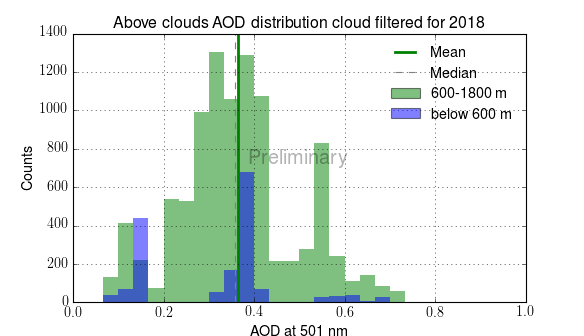

In [59]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='Routine only')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='g',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='grey',label='Median')

#plt.axvline(x=np.nanmean(ar['AOD0501'][ar['flr']]),ls='-',color='y',lw=2.5)
#plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['flr']]),ls='--',color='darkkhaki')

plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered for 2018')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_histogram.png'.format(vv=vv),dpi=600,transparent=True)

In [60]:
np.nanmean(ar['AOD0501'][ar['flr']])

0.44403008423586043

In [61]:
lim = np.linspace(-15,7,12)
pos = np.array([(l+lim[i+1])/2.0 for i,l in enumerate(lim[0:-1])])

<IPython.core.display.Javascript object>


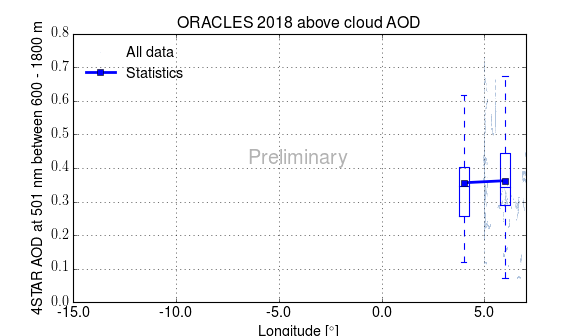

In [62]:
plt.figure()
plt.plot(ar['Longitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,markersize=0.4,label='All data')
plt.xlim([-15,7])
make_boxplot(ar['AOD0501'][ar['fl']],ar['Longitude'][ar['fl']],lim,pos,color='blue',label='Statistics',fliers_off=True)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-15,7])
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES 2018 above cloud AOD')
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_longitude.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


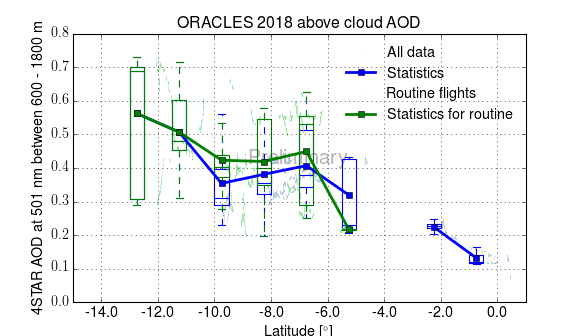

In [64]:
lima = np.linspace(-15,0,11)
posa = np.array([(l+lima[i+1])/2.0 for i,l in enumerate(lima[0:-1])])
plt.figure()
plt.plot(ar['Latitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,markersize=0.4,label='All data')
plt.xlim([-15,1])
make_boxplot(ar['AOD0501'][ar['fl']],ar['Latitude'][ar['fl']],lima,posa,color='blue',label='Statistics',fliers_off=True)

plt.plot(ar['Latitude'][ar['flr']],ar['AOD0501'][ar['flr']],'.',color='lightgreen',alpha=0.5,markersize=0.4,
         label='Routine flights')
plt.xlim([-15,1])
make_boxplot(ar['AOD0501'][ar['flr']],ar['Latitude'][ar['flr']],lima,posa,color='green',label='Statistics for routine',
             fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-15,1])
plt.legend(frameon=False,numpoints=1,loc=1)
prelim()

plt.title('ORACLES 2018 above cloud AOD')
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_latitude.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


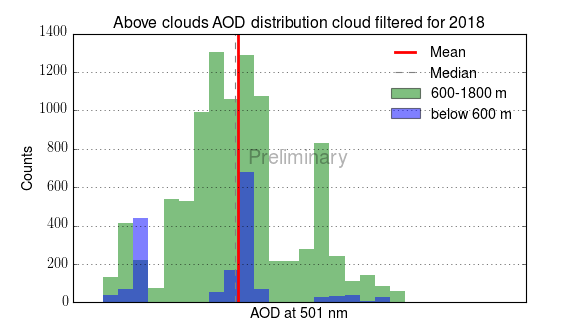

In [65]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='r',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='grey',label='Median')
plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.xticks([])
plt.title('Above clouds AOD distribution cloud filtered for 2018')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_histogram_nox.png'.format(vv=vv),dpi=600,transparent=True)

In [66]:
np.nanmean(ar['AOD0501'][ar['fl']])

0.36497039910176582

<IPython.core.display.Javascript object>


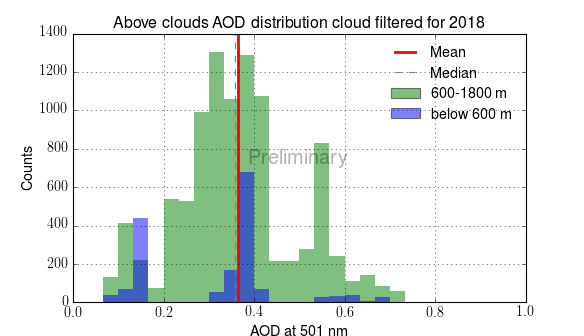

In [67]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='r',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='grey',label='Median')
plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered for 2018')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_histogram.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


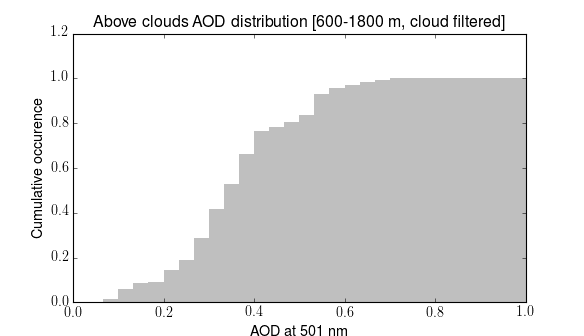

In [56]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='grey',cumulative=True)
plt.xlabel('AOD at 501 nm')
plt.ylabel('Cumulative occurence')
plt.title('Above clouds AOD distribution [600-1800 m, cloud filtered]')
plt.savefig(fp+'aod_ict_2018/{vv}_AOD_histogram_cum.png'.format(vv=vv),dpi=600,transparent=True)

In [68]:
np.nanmean(ar['AOD0501'][ar['fl']])

0.36497039910176582

In [69]:
np.nanmedian(ar['AOD0501'][ar['fl']])

0.35799999999999998

In [70]:
np.nanstd(ar['AOD0501'][ar['fl']])

0.1296437055804309

## Make a histogram of the airmass

In [71]:
ar.keys()

['AOD1040',
 'AOD0532',
 'UNCAOD0620',
 'AOD0530',
 'UNCAOD0550',
 'UNCAOD0700',
 'AOD0470',
 'AOD1627',
 'AOD0520',
 'UNCAOD0606',
 'AOD0606',
 'AOD1064',
 'AOD0700',
 'fl_alt',
 'UNCAOD0452',
 'fl_alt_6',
 'AOD0620',
 'Latitude',
 'AOD0550',
 'AOD0660',
 'AOD0452',
 'fl_routine',
 'AOD0355',
 'fl1',
 'fl',
 'fl3',
 'UNCAOD1020',
 'UNCAOD0675',
 'fl_alt_18',
 'UNCAOD0501',
 'AOD_polycoef_a1',
 'AOD_polycoef_a0',
 'AOD_polycoef_a2',
 'UNCAOD0520',
 'qual_flag',
 'AOD_angstrom_470_865',
 'AOD1559',
 'UNCAOD1650',
 'UNCAOD1250',
 'AOD0501',
 'fl2',
 'Longitude',
 'AOD0865',
 'UNCAOD0660',
 'AOD1250',
 'UNCAOD0380',
 'AOD1650',
 'UNCAOD1236',
 'AOD0675',
 'fl_QA',
 'AOD1236',
 'UNCAOD0470',
 'AOD0380',
 'UNCAOD0865',
 'Start_UTC',
 'flr',
 'UNCAOD0781',
 'days',
 'fl_alt_22',
 'AOD0781',
 'UNCAOD1064',
 'UNCAOD1559',
 'GPS_Alt',
 'amass_aer',
 'UNCAOD1627',
 'UNCAOD0355',
 'UNCAOD0532',
 'UNCAOD1040',
 'UNCAOD0530',
 'AOD1020']

<IPython.core.display.Javascript object>


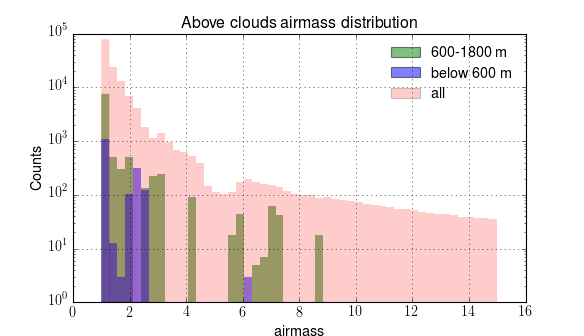

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [72]:
plt.figure()
plt.hist(ar['amass_aer'][ar['fl']],bins=50,range=(1.0,15.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['amass_aer'][ar['fl1']],bins=50,range=(1.0,15.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
plt.hist(ar['amass_aer'],bins=50,range=(1.0,15.0),alpha=0.2,normed=False,edgecolor='None',color='r',label='all')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.xlabel('airmass')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds airmass distribution')
plt.legend(frameon=False)
plt.gca().set_yscale('log')
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_Airmass_histogram.png'.format(vv=vv),dpi=600,transparent=True)

## Make histogram and compare to 2016

### Load 2016

In [38]:
ar_1 = hs.loadmat(fp+'/aod_ict/R2/all_aod_ict_R2.mat')

In [39]:
ar_1.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD0530',
 u'UNCAOD0550',
 u'UNCAOD0700',
 u'AOD0470',
 u'AOD1627',
 u'AOD0520',
 u'UNCAOD0620',
 u'AOD0606',
 u'AOD1064',
 u'Latitude',
 u'UNCAOD0452',
 u'fl_alt_6',
 u'AOD0620',
 u'AOD0700',
 u'AOD0550',
 u'AOD0660',
 u'AOD0452',
 u'AOD0355',
 u'fl1',
 u'UNCAOD1236',
 u'fl2',
 u'UNCAOD1064',
 u'UNCAOD0501',
 u'UNCAOD0606',
 u'UNCAOD0355',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD1559',
 u'UNCAOD1650',
 u'UNCAOD1559',
 u'UNCAOD1250',
 u'AOD0501',
 u'Longitude',
 u'UNCAOD0660',
 u'GPS_Alt',
 u'AOD1250',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD1650',
 u'UNCAOD0470',
 u'AOD0380',
 u'UNCAOD0865',
 u'idays',
 u'Start_UTC',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'AOD0781',
 u'fl_alt_18',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'UNCAOD1627',
 u'UNCAOD1020',
 u'UNCAOD0532',
 u'UNCAOD1040',
 u'UNCAOD0530',
 u'AOD1020']

In [40]:
days_1 = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']

In [41]:
#routine days
rd = [20160831.0,20160904.0,20160908.0,20160910.0,20160912.0,20160925.0]

In [42]:
ar_1['days']

array([ 20160824.,  20160824.,  20160824., ...,  20160930.,  20160930.,
        20160930.])

In [43]:
flr1 = ((ar_1['days']==rd[0]) | (ar_1['days']==rd[1]) | (ar_1['days']==rd[2]) | (ar_1['days']==rd[3]) | (ar_1['days']==rd[4]) | (ar_1['days']==rd[5]))

In [44]:
#flr1 = ((ar_1['days']==4) | (ar_1['days']==6) | (ar_1['days']==8) | (ar_1['days']==9) | (ar_1['days']==10) | (ar_1['days']==15))

In [45]:
ar_1['flr'] = flr1&ar_1['fl_QA']&ar_1['fl_alt']

### Load the 2017 data

In [46]:
ar_2 = hs.loadmat(fp+'/aod_ict_2017/R1/all_aod_ict_R1_2017.mat')

In [47]:
ar_2.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD0530',
 u'UNCAOD0550',
 u'UNCAOD0700',
 u'AOD0355',
 u'AOD1627',
 u'AOD0520',
 u'UNCAOD0620',
 u'AOD0606',
 u'AOD1064',
 u'Latitude',
 u'UNCAOD0452',
 u'fl_alt_6',
 u'AOD0620',
 u'AOD0700',
 u'AOD0550',
 u'AOD0660',
 u'UNCAOD1627',
 u'AOD0452',
 u'fl_routine',
 u'AOD0470',
 u'fl1',
 u'UNCAOD1236',
 u'fl3',
 u'fl2',
 u'UNCAOD1064',
 u'UNCAOD0501',
 u'AOD_angstrom_470_865',
 u'AOD_polycoef_a0',
 u'AOD_polycoef_a2',
 u'UNCAOD0606',
 u'UNCAOD0355',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD1559',
 u'UNCAOD1650',
 u'UNCAOD1559',
 u'UNCAOD1250',
 u'AOD0501',
 u'Longitude',
 u'AOD_polycoef_a1',
 u'UNCAOD0660',
 u'GPS_Alt',
 u'AOD1250',
 u'flac',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD1650',
 u'UNCAOD0470',
 u'AOD0380',
 u'UNCAOD0865',
 u'Start_UTC',
 u'flr',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'fl_alt_22',
 u'AOD0781',
 u'fl_alt_18',
 u'flag_acaod',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'flacr',
 u'UNCAOD1020',
 u'UNCAOD0532',

### Plot the histogram comparisons

In [48]:
len(ar['AOD0501'][ar['fl']]), len(ar_1['AOD0501'][ar_1['fl']]), len(ar_2['AOD0501'][ar_2['fl']])

(9797, 38260, 24595)

In [49]:
np.nanmean(ar['AOD0501'][ar['fl']]),np.nanmean(ar_1['AOD0501'][ar_1['fl']]),np.nanmean(ar_2['AOD0501'][ar_2['fl']])

(0.36497039910176582, 0.33456740721380029, 0.26594783492579793)

<IPython.core.display.Javascript object>


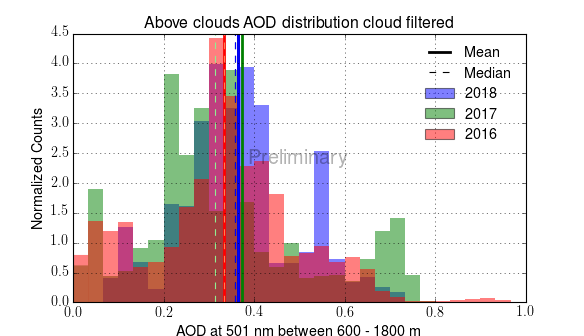

In [52]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='b',label='2018')
plt.hist(ar_2['AOD0501'][ar_2['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='g',label='2017')
plt.hist(ar_1['AOD0501'][ar_1['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='r',label='2016')

#plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl3']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='800-2200 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='k',label='Median')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='b',lw=2.5)
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='b')

plt.axvline(x=np.nanmean(ar_1['AOD0501'][ar_1['fl']]),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(ar_1['AOD0501'][ar_1['fl']]),ls='--',color='coral')

plt.axvline(x=np.nanmean(ar_2['AOD0501'][ar_2['flac']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(ar_2['AOD0501'][ar_2['flac']]),ls='--',color='lightgreen')

plt.xlabel('AOD at 501 nm between 600 - 1800 m')
plt.ylabel('Normalized Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_normed_histogram_2018_2017_2016.png'.format(vv=vv),dpi=600,transparent=True)

In [153]:
ar.keys()

['AOD1040',
 'AOD0532',
 'UNCAOD0620',
 'AOD0530',
 'UNCAOD0550',
 'UNCAOD0700',
 'AOD0470',
 'AOD1627',
 'UNCAOD0606',
 'AOD0606',
 'AOD1064',
 'Latitude',
 'fl_alt',
 'UNCAOD0452',
 'fl_alt_6',
 'AOD0620',
 'AOD0700',
 'AOD0550',
 'AOD0660',
 'AOD0452',
 'AOD0355',
 'fl1',
 'fl',
 'fl3',
 'UNCAOD1020',
 'UNCAOD0675',
 'fl_alt_18',
 'UNCAOD0501',
 'UNCAOD0520',
 'qual_flag',
 'AOD0520',
 'AOD1559',
 'UNCAOD1650',
 'UNCAOD1250',
 'AOD0501',
 'fl2',
 'Longitude',
 'UNCAOD0660',
 'AOD1250',
 'UNCAOD0380',
 'AOD1650',
 'UNCAOD1236',
 'AOD0675',
 'fl_QA',
 'AOD1236',
 'UNCAOD0470',
 'AOD0380',
 'UNCAOD0865',
 'Start_UTC',
 'UNCAOD0781',
 'days',
 'fl_alt_22',
 'AOD0781',
 'UNCAOD1064',
 'UNCAOD1559',
 'AOD1020',
 'AOD0865',
 'amass_aer',
 'UNCAOD1627',
 'UNCAOD0355',
 'UNCAOD0532',
 'UNCAOD1040',
 'UNCAOD0530',
 'GPS_Alt']

<IPython.core.display.Javascript object>


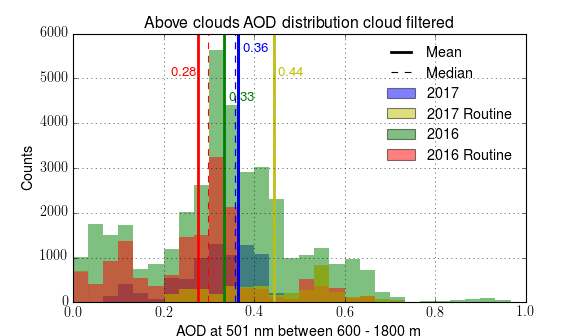

In [53]:
plt.figure()

plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='2018')
#plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='2017 Routine')

plt.hist(ar_1['AOD0501'][ar_1['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='2016')
plt.hist(ar_1['AOD0501'][ar_1['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='2016 Routine')
plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y')

plt.axvline(x=np.nanmean(ar['AOD0501'][ar['flr']]),ls='-',color='y',lw=2.5)
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['flr']]),ls='--',color='darkkhaki')

plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='k',label='Median')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='b',lw=2.5)
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='b')

plt.axvline(x=np.nanmean(ar_1['AOD0501'][ar_1['fl']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(ar_1['AOD0501'][ar_1['fl']]),ls='--',color='g')

plt.axvline(x=np.nanmean(ar_1['AOD0501'][ar_1['flr']]),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(ar_1['AOD0501'][ar_1['flr']]),ls='--',color='r')

plt.text(np.nanmean(ar['AOD0501'][ar['flr']])+0.01,5050,'{:0.2f}'.format(np.nanmean(ar['AOD0501'][ar['flr']])),color='y')
plt.text(np.nanmean(ar['AOD0501'][ar['fl']])+0.01,5600,'{:0.2f}'.format(np.nanmean(ar['AOD0501'][ar['fl']])),color='b')
plt.text(np.nanmean(ar_1['AOD0501'][ar_1['fl']])+0.01,4500,'{:0.2f}'.format(np.nanmean(ar_1['AOD0501'][ar_1['fl']])),color='g')
plt.text(np.nanmean(ar_1['AOD0501'][ar_1['flr']])-0.06,5050,'{:0.2f}'.format(np.nanmean(ar_1['AOD0501'][ar_1['flr']])),color='r')

plt.xlabel('AOD at 501 nm between 600 - 1800 m')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
#prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_histogram_2018_2017_2016_withroutine.png'.format(vv=vv),dpi=600,transparent=True)

In [ ]:
plt.figure()

plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='g',label='2018 Routine')
plt.hist(ar_2['AOD0501'][ar_2['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='y',label='2017 Routine')

#plt.hist(ar_1['AOD0501'][ar_1['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='2016')
plt.hist(ar_1['AOD0501'][ar_1['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='r',label='2016 Routine')

plt.axvline(x=np.nanmean(ar['AOD0501'][ar['flr']]),ls='-',color='y',lw=2.5)
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['flr']]),ls='--',color='darkkhaki')

plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='k',label='Median')
#plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl']]),ls='-',color='b',lw=2.5)
#plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl']]),ls='--',color='b')

plt.axvline(x=np.nanmean(ar_1['AOD0501'][ar_1['fl']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(ar_1['AOD0501'][ar_1['fl']]),ls='--',color='g')

plt.axvline(x=np.nanmean(ar_1['AOD0501'][ar_1['flr']]),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(ar_1['AOD0501'][ar_1['flr']]),ls='--',color='r')

plt.text(np.nanmean(ar['AOD0501'][ar['flr']])+0.01,5050,'{:0.2f}'.format(np.nanmean(ar['AOD0501'][ar['flr']])),color='y')
#plt.text(np.nanmean(ar['AOD0501'][ar['fl']])+0.01,5600,'{:0.2f}'.format(np.nanmean(ar['AOD0501'][ar['fl']])),color='b')
plt.text(np.nanmean(ar_1['AOD0501'][ar_1['fl']])+0.01,4500,'{:0.2f}'.format(np.nanmean(ar_1['AOD0501'][ar_1['fl']])),color='g')
plt.text(np.nanmean(ar_1['AOD0501'][ar_1['flr']])-0.06,5050,'{:0.2f}'.format(np.nanmean(ar_1['AOD0501'][ar_1['flr']])),color='r')

plt.xlabel('AOD at 501 nm between 600 - 1800 m')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
#prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict_2018/{vv}/{vv}_AOD_histogram_2018_2017_2016_withroutine.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>

### Plot the longitudinal dependence of 2017 vs 2016

In [21]:
lim2 = np.linspace(-15,15,16)
pos2 = np.array([(l+lim2[i+1])/2.0 for i,l in enumerate(lim2[0:-1])])

<IPython.core.display.Javascript object>


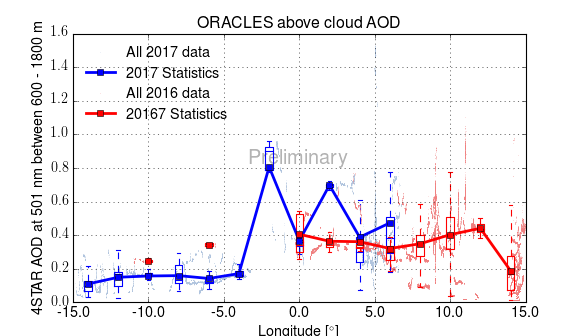

In [24]:
plt.figure()
plt.plot(ar['Longitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,
         markersize=0.4,label='All 2017 data')
plt.xlim([-15,15])
make_boxplot(ar['AOD0501'][ar['fl']],ar['Longitude'][ar['fl']],lim,pos,color='blue',label='2017 Statistics',fliers_off=True)
plt.plot(ar_1['Longitude'][ar_1['fl']],ar_1['AOD0501'][ar_1['fl']],'.',color='lightcoral',alpha=0.5,
         markersize=0.4,label='All 2016 data')
make_boxplot(ar_1['AOD0501'][ar_1['fl']],ar_1['Longitude'][ar_1['fl']],lim2,pos2,color='red',
             label='20167 Statistics',fliers_off=True)

plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-15,15])
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_longitude_2016_vs_2017.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


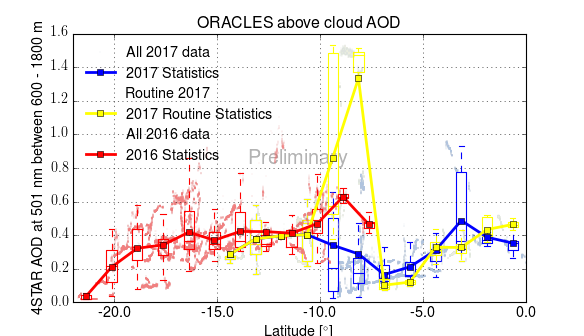

In [210]:
lima = np.linspace(-15,0,13)
posa = np.array([(l+lima[i+1])/2.0 for i,l in enumerate(lima[0:-1])])
plt.figure()
plt.plot(ar['Latitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,
         markersize=0.4,label='All 2017 data')
plt.xlim([-22,0])
make_boxplot(ar['AOD0501'][ar['fl']],ar['Latitude'][ar['fl']],lima,posa,color='blue',label='2017 Statistics',fliers_off=True)
plt.plot(ar['Latitude'][ar['flr']],ar['AOD0501'][ar['flr']],'.',color='lightyellow',alpha=0.5,
         markersize=0.4,label='Routine 2017')
make_boxplot(ar['AOD0501'][ar['flr']],ar['Latitude'][ar['flr']],lima,posa,color='yellow',label='2017 Routine Statistics',
             fliers_off=True)


lim2a = np.linspace(-22,-7,13)
pos2a = np.array([(l+lim2a[i+1])/2.0 for i,l in enumerate(lim2a[0:-1])])
plt.plot(ar_1['Latitude'][ar_1['fl']],ar_1['AOD0501'][ar_1['fl']],'.',color='lightcoral',alpha=0.5,
         markersize=0.4,label='All 2016 data')
make_boxplot(ar_1['AOD0501'][ar_1['fl']],ar_1['Latitude'][ar_1['fl']],lim2a,pos2a,color='red',
             label='2016 Statistics',fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-22,0])
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_latitude_2016_vs_2017.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


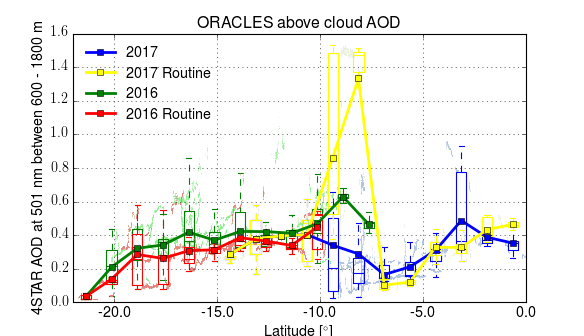

In [46]:
lima = np.linspace(-15,0,13)
posa = np.array([(l+lima[i+1])/2.0 for i,l in enumerate(lima[0:-1])])
plt.figure()
plt.plot(ar['Latitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,
         markersize=0.4)
plt.xlim([-22,0])
make_boxplot(ar['AOD0501'][ar['fl']],ar['Latitude'][ar['fl']],lima,posa,color='blue',label='2017',fliers_off=True)
plt.plot(ar['Latitude'][ar['flr']],ar['AOD0501'][ar['flr']],'.',color='lightyellow',alpha=0.5,
         markersize=0.4)
make_boxplot(ar['AOD0501'][ar['flr']],ar['Latitude'][ar['flr']],lima,posa,color='yellow',label='2017 Routine',
             fliers_off=True)


lim2a = np.linspace(-22,-7,13)
pos2a = np.array([(l+lim2a[i+1])/2.0 for i,l in enumerate(lim2a[0:-1])])
plt.plot(ar_1['Latitude'][ar_1['fl']],ar_1['AOD0501'][ar_1['fl']],'.',color='lightgreen',alpha=0.5,
         markersize=0.4)
make_boxplot(ar_1['AOD0501'][ar_1['fl']],ar_1['Latitude'][ar_1['fl']],lim2a,pos2a,color='green',
             label='2016',fliers_off=True)
plt.plot(ar_1['Latitude'][ar_1['flr']],ar_1['AOD0501'][ar_1['flr']],'.',color='lightcoral',alpha=0.5,
         markersize=0.4)
make_boxplot(ar_1['AOD0501'][ar_1['flr']],ar_1['Latitude'][ar_1['flr']],lim2a,pos2a,color='red',
             label='2016 Routine',fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-22,0])
plt.legend(frameon=False,numpoints=1,loc=2)
#prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_latitude_2016_vs_2017_withroutine.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


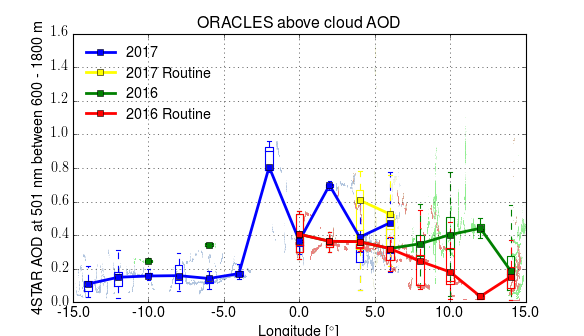

In [41]:
lima = np.linspace(-15,0,13)
posa = np.array([(l+lima[i+1])/2.0 for i,l in enumerate(lima[0:-1])])
plt.figure()
plt.plot(ar['Longitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,
         markersize=0.4)
plt.xlim([-15,15])
make_boxplot(ar['AOD0501'][ar['fl']],ar['Longitude'][ar['fl']],lim,pos,color='blue',label='2017',fliers_off=True)
plt.plot(ar['Longitude'][ar['flr']],ar['AOD0501'][ar['flr']],'.',color='lightyellow',alpha=0.5,
         markersize=0.4)
make_boxplot(ar['AOD0501'][ar['flr']],ar['Longitude'][ar['flr']],lim,pos,color='yellow',label='2017 Routine',
             fliers_off=True)


plt.plot(ar_1['Longitude'][ar_1['fl']],ar_1['AOD0501'][ar_1['fl']],'.',color='lightgreen',alpha=0.5,
         markersize=0.4)
make_boxplot(ar_1['AOD0501'][ar_1['fl']],ar_1['Longitude'][ar_1['fl']],lim2,pos2,color='green',
             label='2016',fliers_off=True)
plt.plot(ar_1['Longitude'][ar_1['flr']],ar_1['AOD0501'][ar_1['flr']],'.',color='lightcoral',alpha=0.5,
         markersize=0.4)
make_boxplot(ar_1['AOD0501'][ar_1['flr']],ar_1['Longitude'][ar_1['flr']],lim2,pos2,color='red',
             label='2016 Routine',fliers_off=True)

plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-15,15])
plt.legend(frameon=False,numpoints=1,loc=2)
#prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_longitude_2016_vs_2017_withroutine.png'.format(vv=vv),dpi=600,transparent=True)






if False:
    plt.figure()
    plt.plot(ar['Longitude'][ar['fl']],ar['AOD0501'][ar['fl']],'.',color='lightsteelblue',alpha=0.5,
             markersize=0.4,label='All 2017 data')
    plt.xlim([-15,15])
    make_boxplot(ar['AOD0501'][ar['fl']],ar['Longitude'][ar['fl']],lim,pos,color='blue',label='2017',fliers_off=True)
    plt.plot(ar_1['Longitude'][ar_1['fl']],ar_1['AOD0501'][ar_1['fl']],'.',color='lightcoral',alpha=0.5,
             markersize=0.4,label='All 2016 data')
    make_boxplot(ar_1['AOD0501'][ar_1['fl']],ar_1['Longitude'][ar_1['fl']],lim2,pos2,color='red',
                 label='20167 Statistics',fliers_off=True)

    plt.xlabel('Longitude [$^\\circ$]')
    plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
    plt.grid()
    plt.xlim([-15,15])
    plt.legend(frameon=False,numpoints=1,loc=2)
    prelim()

    plt.title('ORACLES above cloud AOD')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_longitude_2016_vs_2017.png'.format(vv=vv),dpi=600,transparent=True)


<IPython.core.display.Javascript object>


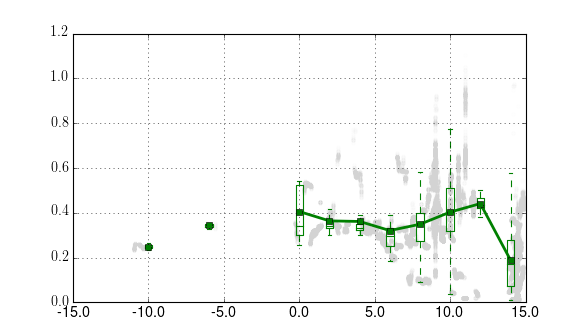

In [44]:
plt.figure()
plt.plot(ar_1['Longitude'][ar_1['fl']],ar_1['AOD0501'][ar_1['fl']],'.',color='lightgrey',alpha=0.01)
plt.xlim([-15.0,15.0])
make_boxplot(ar_1['AOD0501'][ar_1['fl']],ar_1['Longitude'][ar_1['fl']],lim2,pos2,color='green',
             label='2016',fliers_off=True)
plt.xlim([-15.0,15.0])
plt.xticks([-15,-10,-5,0,5,10,15])
plt.xlim([-15.0,15.0])
plt.grid()
#plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_longitude_2016_all.png'.format(vv=vv),dpi=600,transparent=True)

In [25]:
make_boxplot(ar_1['AOD0501'][ar_1['flr']],ar_1['Longitude'][ar_1['flr']],lim2,pos2,color='red',
             label='2016 Routine',fliers_off=True)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.40563330125120306,
 0.36393878825733922,
 0.3613498723093761,
 0.32072785258681785,
 0.24506207121855603,
 0.18091590013140604,
 0.035463667820069197,
 0.15148435643564359]

In [31]:
ar_1['Longitude'][ar_1['flr']]

array([], dtype=float64)

# Plot aod spectra

In [50]:
len(ar['AOD0501'][ar['fl']]),len(ar['AOD0501'])

(24471, 397822)

In [56]:
fl = np.where(ar['fl'])[0]
fl_1 = np.where(ar_1['flr'])[0]

In [57]:
np.sort(ar.keys())

array([u'AOD0355', u'AOD0380', u'AOD0452', u'AOD0470', u'AOD0501',
       u'AOD0520', u'AOD0530', u'AOD0532', u'AOD0550', u'AOD0606',
       u'AOD0620', u'AOD0660', u'AOD0675', u'AOD0700', u'AOD0781',
       u'AOD0865', u'AOD1020', u'AOD1040', u'AOD1064', u'AOD1236',
       u'AOD1250', u'AOD1559', u'AOD1627', u'AOD1650', u'GPS_Alt',
       u'Latitude', u'Longitude', u'Start_UTC', u'UNCAOD0355',
       u'UNCAOD0380', u'UNCAOD0452', u'UNCAOD0470', u'UNCAOD0501',
       u'UNCAOD0520', u'UNCAOD0530', u'UNCAOD0532', u'UNCAOD0550',
       u'UNCAOD0606', u'UNCAOD0620', u'UNCAOD0660', u'UNCAOD0675',
       u'UNCAOD0700', u'UNCAOD0781', u'UNCAOD0865', u'UNCAOD1020',
       u'UNCAOD1040', u'UNCAOD1064', u'UNCAOD1236', u'UNCAOD1250',
       u'UNCAOD1559', u'UNCAOD1627', u'UNCAOD1650', u'amass_aer', u'days',
       u'fl', u'fl1', u'fl2', u'fl3', u'fl_QA', u'fl_alt', u'fl_alt_18',
       u'fl_alt_22', u'fl_alt_6', u'fl_routine', u'flr', u'qual_flag'],
      dtype='<U10')

In [92]:
aodsp = np.array([[ar['AOD0355'][i],ar['AOD0380'][i],ar['AOD0452'][i],ar['AOD0470'][i],ar['AOD0501'][i],
                   ar['AOD0520'][i],ar['AOD0530'][i],ar['AOD0532'][i],ar['AOD0550'][i],ar['AOD0606'][i],ar['AOD0620'][i],ar['AOD0660'][i],ar['AOD0675'][i],ar['AOD0700'][i],
                   ar['AOD0781'][i],ar['AOD0865'][i],ar['AOD1020'][i],ar['AOD1040'][i],ar['AOD1064'][i],ar['AOD1236'][i],ar['AOD1250'][i],ar['AOD1559'][i],ar['AOD1627'][i],
                   ar['AOD1650'][i]] for i in fl])

In [91]:
aodsp1 = np.array([[ar_1['AOD0355'][i],ar_1['AOD0380'][i],ar_1['AOD0452'][i],ar_1['AOD0470'][i],ar_1['AOD0501'][i],
                   ar_1['AOD0520'][i],ar_1['AOD0530'][i],ar_1['AOD0532'][i],ar_1['AOD0550'][i],ar_1['AOD0606'][i],ar_1['AOD0620'][i],ar_1['AOD0660'][i],ar_1['AOD0675'][i],ar_1['AOD0700'][i],
                   ar_1['AOD0781'][i],ar_1['AOD0865'][i],ar_1['AOD1020'][i],ar_1['AOD1040'][i],ar_1['AOD1064'][i],ar_1['AOD1236'][i],ar_1['AOD1250'][i],ar_1['AOD1559'][i],ar_1['AOD1627'][i],
                   ar_1['AOD1650'][i]] for i in fl_1])

In [62]:
aodsp.shape

(24471, 29)

In [63]:
bins = np.linspace(-22, 1, 50)
digitized = np.digitize(ar['Latitude'][fl], bins)

cc = plt.cm.gist_ncar(len(bins))

In [64]:
bins

array([-22.        , -21.53061224, -21.06122449, -20.59183673,
       -20.12244898, -19.65306122, -19.18367347, -18.71428571,
       -18.24489796, -17.7755102 , -17.30612245, -16.83673469,
       -16.36734694, -15.89795918, -15.42857143, -14.95918367,
       -14.48979592, -14.02040816, -13.55102041, -13.08163265,
       -12.6122449 , -12.14285714, -11.67346939, -11.20408163,
       -10.73469388, -10.26530612,  -9.79591837,  -9.32653061,
        -8.85714286,  -8.3877551 ,  -7.91836735,  -7.44897959,
        -6.97959184,  -6.51020408,  -6.04081633,  -5.57142857,
        -5.10204082,  -4.63265306,  -4.16326531,  -3.69387755,
        -3.2244898 ,  -2.75510204,  -2.28571429,  -1.81632653,
        -1.34693878,  -0.87755102,  -0.40816327,   0.06122449,
         0.53061224,   1.        ])

In [65]:
digitized

array([30, 30, 30, ..., 31, 31, 31])

In [68]:
cc = plt.cm.gist_ncar(bins)

In [69]:
cc.shape

(50, 4)

In [87]:
len(wv)

24

In [89]:
len(aodsp[j,:])

29

In [90]:
wv

[355.0,
 380.0,
 452.0,
 470.0,
 501.0,
 520.0,
 530.0,
 532.0,
 550.0,
 606.0,
 620.0,
 660.0,
 675.0,
 700.0,
 781.0,
 865.0,
 1020.0,
 1040.0,
 1064.0,
 1236.0,
 1250.0,
 1559.0,
 1627.0,
 1650.0]

<IPython.core.display.Javascript object>


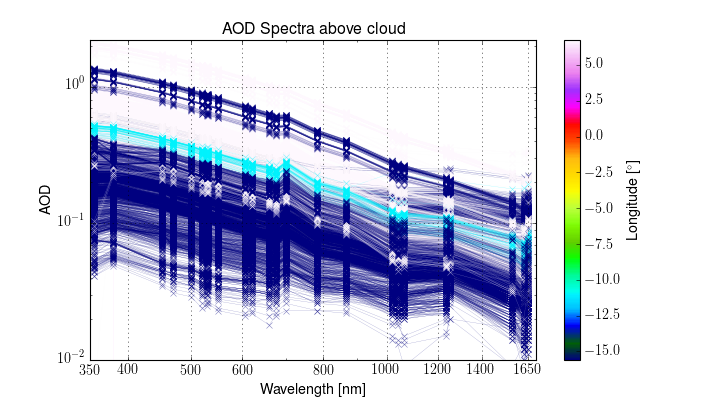

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


In [115]:
fig,ax = plt.subplots(1,sharex=True,figsize=(9,5))
#ax = ax.ravel()
ax.set_title('AOD Spectra above cloud')
axis = ar['days'][fl]
bins = np.linspace(-22, 10, 50)
digitized = np.digitize(ar['Longitude'][fl], bins)
cc = plt.cm.gist_ncar(bins)
cmapname = 'gist_ncar'

for j,f in enumerate(fl):
    if j%5>0: continue
    if not np.isfinite(aodsp[j,:]).any(): continue
    if any(aodsp[j,:]>0.0):
        ax.plot(wv,aodsp[j,:],'x-',c=cc[digitized[j],:],lw=0.2,alpha=0.5)
ax.set_ylim(0.01,2.2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('AOD')
ax.set_ylim(0.01,2.2)
ax.set_xlabel('Wavelength [nm]')
ax.set_xlim(380.0,1700.0)
plt.xticks([350,400,500,600,800,1000,1200,1400,1650])

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid()

scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap(cmapname))
scalarmap.set_array(axis)
cba = plt.colorbar(scalarmap)
cba.set_label('Longitude [$^\\circ$]')
#plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_high_alt_AOD_spectra_{vi}_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


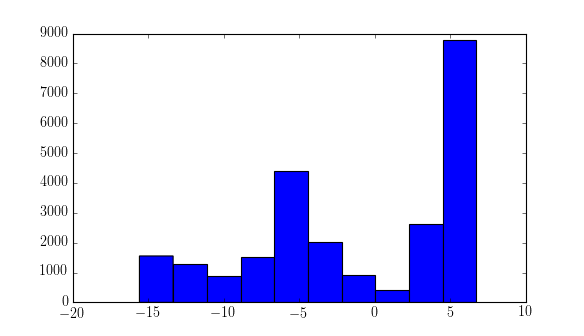

(array([ 1555.,  1285.,   897.,  1530.,  4410.,  2035.,   909.,   427.,
         2623.,  8800.]),
 array([-15.5973301 , -13.36387993, -11.13042976,  -8.89697959,
         -6.66352942,  -4.43007925,  -2.19662908,   0.03682109,
          2.27027126,   4.50372143,   6.7371716 ]),
 <a list of 10 Patch objects>)

In [112]:
plt.figure()
plt.hist(ar['Longitude'][fl])

In [99]:
cc[digitized[j],:]

array([ 0.   ,  0.   ,  0.502,  1.   ])

# Make histogram for each flight 

In [53]:
i=0

In [54]:
np.nanmean(outaod_RA[i]['AOD0501'][fl])

NameError: name 'fl' is not defined

<IPython.core.display.Javascript object>


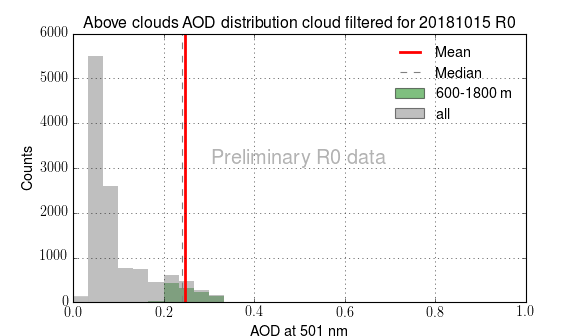

In [55]:
for i,d in enumerate(days):
    plt.figure()
    
    fl_alt = (outaod_RA[i]['GPS_Alt']>600) & (outaod_RA[i]['GPS_Alt']<1800)
    fl_QA = outaod_RA[i]['qual_flag']==0
    fl = fl_alt & fl_QA
    
    plt.hist(outaod_RA[i]['AOD0501'][fl],bins=30,range=(0,1.0),alpha=0.5,normed=False,
             edgecolor='None',color='g',label='600-1800 m')
    plt.hist(outaod_RA[i]['AOD0501'][fl_QA],bins=30,range=(0,1.0),alpha=0.5,normed=False,
             edgecolor='None',color='grey',label='all')
    plt.axvline(x=np.nanmean(outaod_RA[i]['AOD0501'][fl]),ls='-',color='r',lw=2.5,label='Mean')
    plt.axvline(x=np.nanmedian(outaod_RA[i]['AOD0501'][fl]),ls='--',color='grey',label='Median')
    plt.text(0.5, 0.5, 'Preliminary {} data'.format(vv),
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
    plt.xlabel('AOD at 501 nm')
    plt.ylabel('Counts')
    plt.grid()
    plt.title('Above clouds AOD distribution cloud filtered for {} {vv}'.format(d,vv=vv))
    plt.legend(frameon=False)
    plt.savefig(fp+'aod_ict_2018/{vv}/AOD_500_histogram_{}_{vv}.png'.format(d,vv=vv),dpi=600,transparent=True)

# Compare R0 and R1

In [63]:
ar1 = ar
ar0 = hs.loadmat(fp+'/aod_ict/all_aod_ict_R0.mat')

NameError: name 'hs' is not defined

In [64]:
ar1['fl_alt_6k'] = ar1['GPS_Alt'] > 5700.0
ar1['fl_up'] = ar1['fl_QA']&ar1['fl_alt_6k']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [65]:
ar0['fl_alt_6k'] = ar0['GPS_Alt'] > 5700.0
ar0['fl_up'] = ar0['fl_QA']&ar0['fl_alt_6k']

NameError: name 'ar0' is not defined

In [66]:
ar0.keys()

NameError: name 'ar0' is not defined

<IPython.core.display.Javascript object>


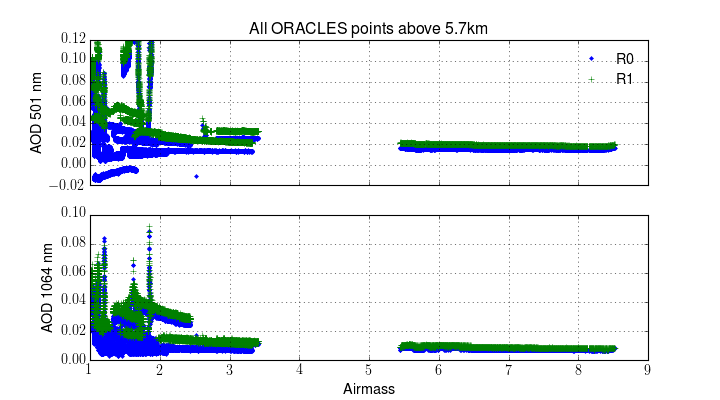

In [104]:
fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
ax = ax.ravel()
ax[0].plot(ar0['amass_aer'][ar0['fl_up']],ar0['AOD0501'][ar0['fl_up']],'.',label='R0')
ax[0].plot(ar1['amass_aer'][ar1['fl_up']],ar1['AOD0501'][ar1['fl_up']],'+',label='R1')
ax[0].set_ylabel('AOD 501 nm')
ax[0].set_ylim(-0.02,0.12)
ax[0].set_title('All ORACLES points above 5.7km')
ax[0].legend(frameon=False,numpoints=1)
ax[0].grid()

ax[1].plot(ar0['amass_aer'][ar0['fl_up']],ar0['AOD1064'][ar0['fl_up']],'.',label='R0')
ax[1].plot(ar1['amass_aer'][ar1['fl_up']],ar1['AOD1064'][ar1['fl_up']],'+',label='R1')
ax[1].set_xlabel('Airmass')
ax[1].set_ylabel('AOD 1064 nm')
ax[1].grid()

plt.savefig(fp+'aod_ict/{vv}/AOD_airmass_R0_vs_R1.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


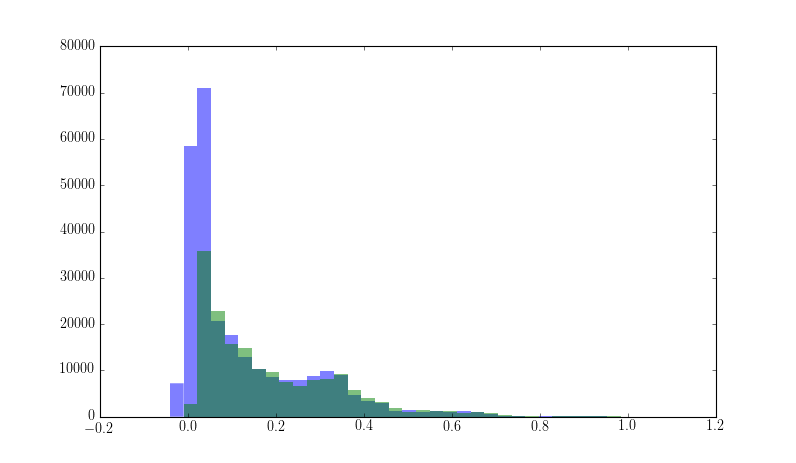

(array([  0.00000000e+00,   2.74800000e+03,   3.57460000e+04,
          2.27240000e+04,   1.57580000e+04,   1.47450000e+04,
          1.02030000e+04,   9.74100000e+03,   7.59900000e+03,
          6.52400000e+03,   8.01100000e+03,   8.22000000e+03,
          9.24000000e+03,   5.78400000e+03,   3.98900000e+03,
          3.18600000e+03,   1.97700000e+03,   1.04900000e+03,
          1.41800000e+03,   1.21900000e+03,   1.14100000e+03,
          8.12000000e+02,   1.11400000e+03,   7.41000000e+02,
          4.42000000e+02,   1.68000000e+02,   8.50000000e+01,
          3.30000000e+01,   7.00000000e+01,   7.10000000e+01,
          7.00000000e+01,   8.80000000e+01,   5.00000000e+01,
          1.10000000e+01,   3.00000000e+00,   7.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([-0.04 , -0.009,  0.022,  0.053,  0.084,  0.115,  0.146,  0.177,
         0.208,  0.239,  0.27 ,  0.301,  0.332,  0.363,  0.394,  0.425,
         0.456,  0.487

In [91]:
plt.figure()
plt.hist(ar0['AOD0501'][ar0['fl_QA']],bins=40,label='R0',range=(-0.04,1.2),alpha=0.5,edgecolor='None')
plt.hist(ar1['AOD0501'][ar1['fl_QA']],bins=40,label='R1',range=(-0.04,1.2),alpha=0.5,edgecolor='None')
plt.ylabel('AOd 501 nm')

# make plots of the gases

In [ ]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outgas_RA[i][nm[0]],outgas_RA[i][aod],'.',label=aod)
    try:
        for x in outgas_RA[i][nm[0]][np.where(outgas_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/RA_{}.png'.format(d),dpi=600,transparent=True)

In [32]:
outgas_RA[0].dtype.names

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'amass_O3',
 'amass_NO2',
 'CWV',
 'std_CWV',
 'QA_CWV',
 'VCD_O3',
 'resid_O3',
 'QA_O3',
 'VCD_NO2',
 'resid_NO2',
 'QA_NO2',
 'qual_flag')

<IPython.core.display.Javascript object>


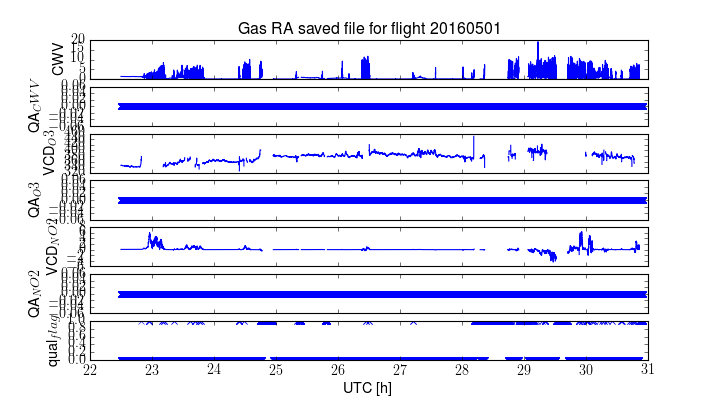

<IPython.core.display.Javascript object>


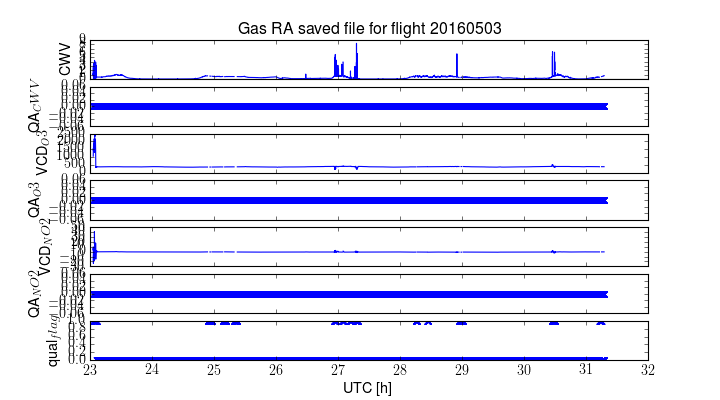

<IPython.core.display.Javascript object>


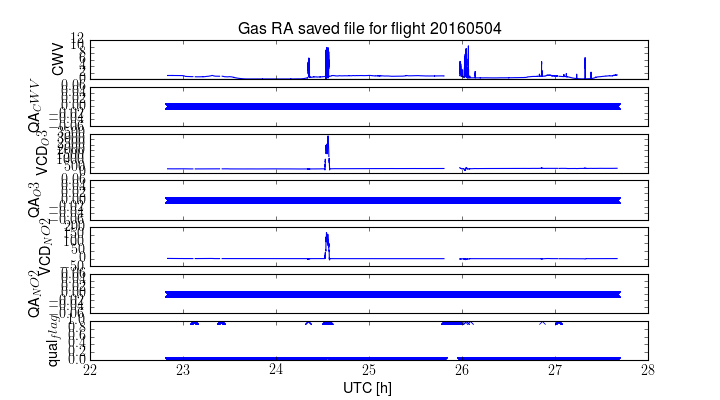

<IPython.core.display.Javascript object>


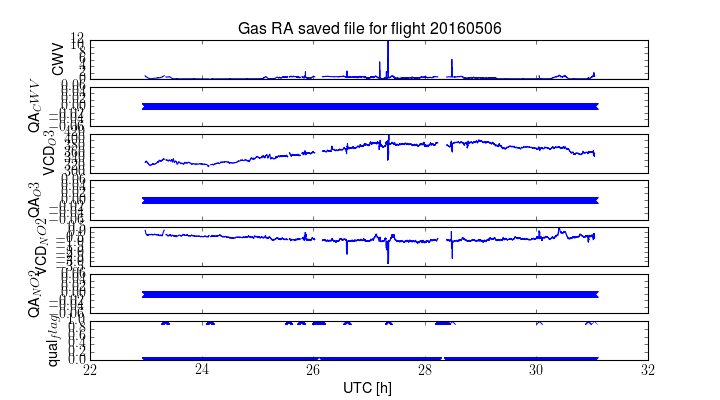

In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(7,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    
    ax[0].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['CWV'])
    ax[0].set_ylabel('CWV')
    #ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    #box = ax[0].get_position()
    #ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_CWV'],'x')
    ax[1].set_ylabel('QA_CWV')
    
    ax[2].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_O3'])
    ax[2].set_ylabel('VCD_O3')
    
    ax[3].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_O3'],'x')
    ax[3].set_ylabel('QA_O3')
    
    ax[4].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_NO2'])
    ax[4].set_ylabel('VCD_NO2')
    
    ax[5].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_NO2'],'x')
    ax[5].set_ylabel('QA_NO2')
    
    ax[6].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['qual_flag'],'x')
    ax[6].set_ylabel('qual_flag')
    
    ax[6].set_xlabel('UTC [h]')